1687357364.2681432
1687357364.268884
1687357364.269184


/var/folders/vf/842hmrqn18z65j0fs1m3p8200000gn/T/ipykernel_39759/642500977.py:25: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(beta*E) + 1 )


1687357388.913975


/var/folders/vf/842hmrqn18z65j0fs1m3p8200000gn/T/ipykernel_39759/642500977.py:37: RuntimeWarning: invalid value encountered in scalar divide
  return (gap_0**2 - gap_q**2) / (gap_0**2*q**2)


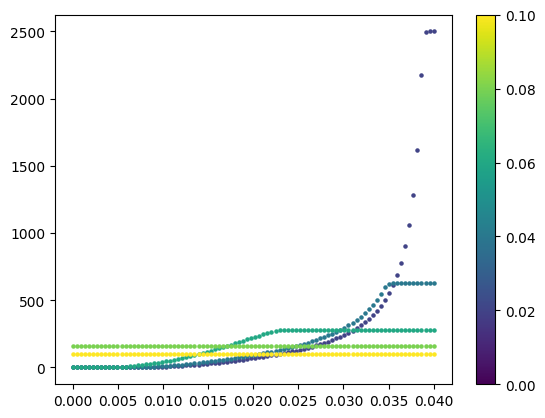

1687357393.308529


In [18]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from time import time

print(time())

## gap_eq をdef
def e_k_spin(k1, k2, q, y, B): 
    return 2*t*(np.cos(a*(k1+q/2))+np.cos(a*(k2))) - u + y * 1/2 * gu * B

def e_k_s(k1, k2, q, B):
    return (e_k_spin(k1, k2, q, 1, B) + e_k_spin(-1*k1, k2, q, -1, B))/2

def e_k_a(k1, k2, q, B):
    return (e_k_spin(k1, k2, q, 1, B) - e_k_spin(-1*k1, k2, q, -1, B))/2

def E_k_q(k1, k2, gap, q, B):
    return np.sqrt(e_k_s(k1, k2, q, B)**2 + gap**2)

def E_k_q_s(k1, k2, gap, q, y, B):
    return E_k_q(k1, k2, gap, q, B) + y * e_k_a(k1, k2, q, B)

def Fermi(beta, E):
    return 1 / (np.exp(beta*E) + 1 )

def func(k1, k2, gap, q, B): 
    return gap*(1-Fermi(beta, E_k_q_s(k1, k2, gap, q, -1, B))-Fermi(beta, E_k_q_s(k1, k2, gap, q, 1, B)))/(2*E_k_q(k1, k2, gap, q, B))

def rhs(gap, q, B):
    k1 = -1 * np.pi/a + 2 * arange(N) * np.pi / (a * N)
    kx, ky = meshgrid(k1, k1, indexing='ij')
    f = func(kx, ky, gap, q, B)
    return (V / (N**2)) * sum(f)

def coherence_length(gap_q, gap_0, q):
    return (gap_0**2 - gap_q**2) / (gap_0**2*q**2)


print(time())

##パラメータの調整
N, V, t, a, u, gu, n0, n1, n2 =30, 1, 1, 1, 0, 1, 6, 1, 90    # 7.525 #9.21
qs   = np.linspace(0,0.1,n0)  #(np.pi/a)
Bs   = np.linspace(0.0,0.1,n1)     #np.linspace(0,0.08,n1)
kBTs = np.linspace(1e-5,0.04,n2)

print(time())

##ギャップの逐次計算
ans = []
for h in range(n0):
    ans0 = []
    for i in range(n1):
        ans1 = []
        for j in range(n2): # それぞれの温度で秩序パラメータを計算
            beta, d0 = 1/kBTs[j], 100.0
            for k in range(1000): # 収束するまで最大1000回ループ
                d1 = rhs(d0, qs[h], Bs[i]) 
                if abs(d1-d0) < 1e-10: break # 収束チェック
                d0 = d1
            ans1.append([d0, abs(d1-d0), k])
        ans0.append(ans1)
    ans.append(ans0)
ans = np.array(ans)

print(time())

##coherence_lengthの計算
ans_c = []
for h in range(n0):
    ans0 = []
    for i in range(n1):
        ans1 = []
        for j in range(n2): # それぞれの温度で秩序パラメータを計算
            ans1.append(coherence_length(ans[h][i][j][0], ans[0][i][j][0], qs[h]))
        ans0.append(ans1)
    ans_c.append(ans0)
ans_c = np.array(ans_c)


for j in range(n2):    ##q,gap図
    for i in range(n1):
        ans_q = []
        for h in range(n0):
            figure = plt.scatter(kBTs[j], ans_c[h][i][j], 5, c=qs[h],  cmap='viridis' ,vmin=0, vmax=0.1)
c= plt.colorbar()
plt.savefig("FFLO_q-gap(N=100,B=0.04).png")
plt.show()

print(time())